# Câu 1

## Khai báo các thư viện

In [116]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, confusion_matrix

## Khái quát về tập dữ liệu

In [117]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')  

In [118]:
# Các thuộc tính và kiểu dữ liệu của từng thuộc tính
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [119]:
print('Dữ liệu rỗng hoặc null: ', data.isnull().sum().sum())
print('Dữ liệu bị trùng: ', data.duplicated().sum())

Dữ liệu rỗng hoặc null:  0
Dữ liệu bị trùng:  24


In [120]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [121]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [122]:
# Phân loại các cột theo kiểu dữ liệu
numerical_cols = data[['Age', 'Height', 'Weight']]
categorical_cols = data[['CAEC', 'CALC', 'MTRANS']]
boolean_cols = data[['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'NObeyesdad']]

In [123]:
print('Cột số: ', numerical_cols.columns)
print('Cột phân loại: ', categorical_cols.columns)
print('Cột boolean: ', boolean_cols.columns)

Cột số:  Index(['Age', 'Height', 'Weight'], dtype='object')
Cột phân loại:  Index(['CAEC', 'CALC', 'MTRANS'], dtype='object')
Cột boolean:  Index(['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC',
       'NObeyesdad'],
      dtype='object')


## Trực quan hóa dữ liệu
### Chọn cột mục tiêu
**Dựa vào thuộc tính của tập dữ liệu, chọn cột mục tiêu như sau:**
- Classification: `Weight`

- Regression: `NObeyesdad`

In [124]:
sns.set_theme(style="whitegrid")

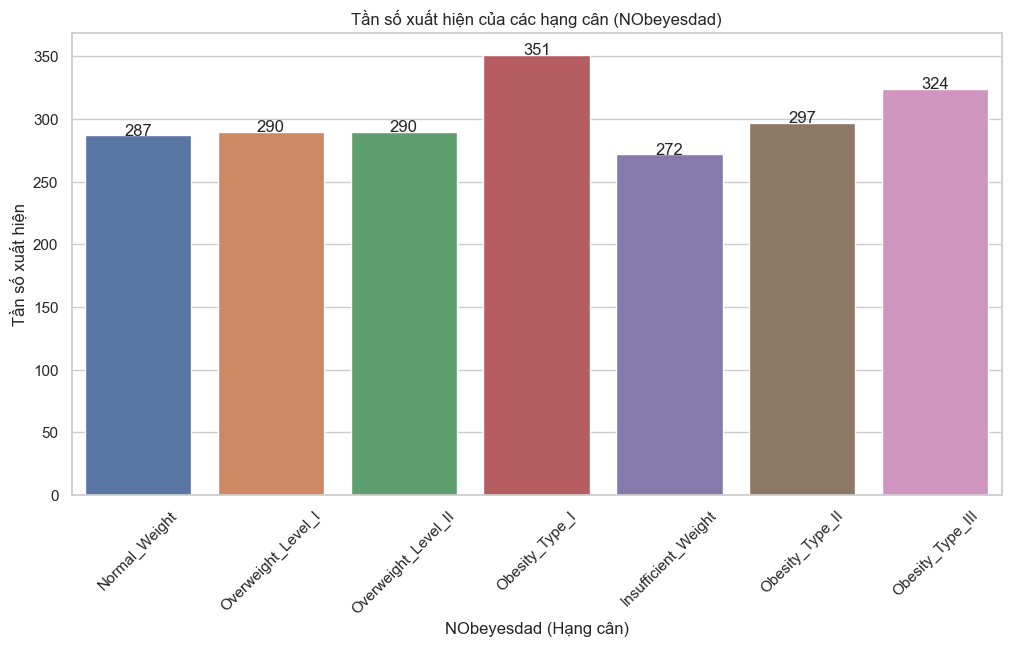

In [125]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='NObeyesdad', data=data, hue='NObeyesdad', palette='deep', dodge=False, legend=False)
plt.title('Tần số xuất hiện của các hạng cân (NObeyesdad)')
plt.xlabel('NObeyesdad (Hạng cân)')
plt.xticks(rotation=45)

plt.ylabel('Tần số xuất hiện')

# Vẽ số lượng trên cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

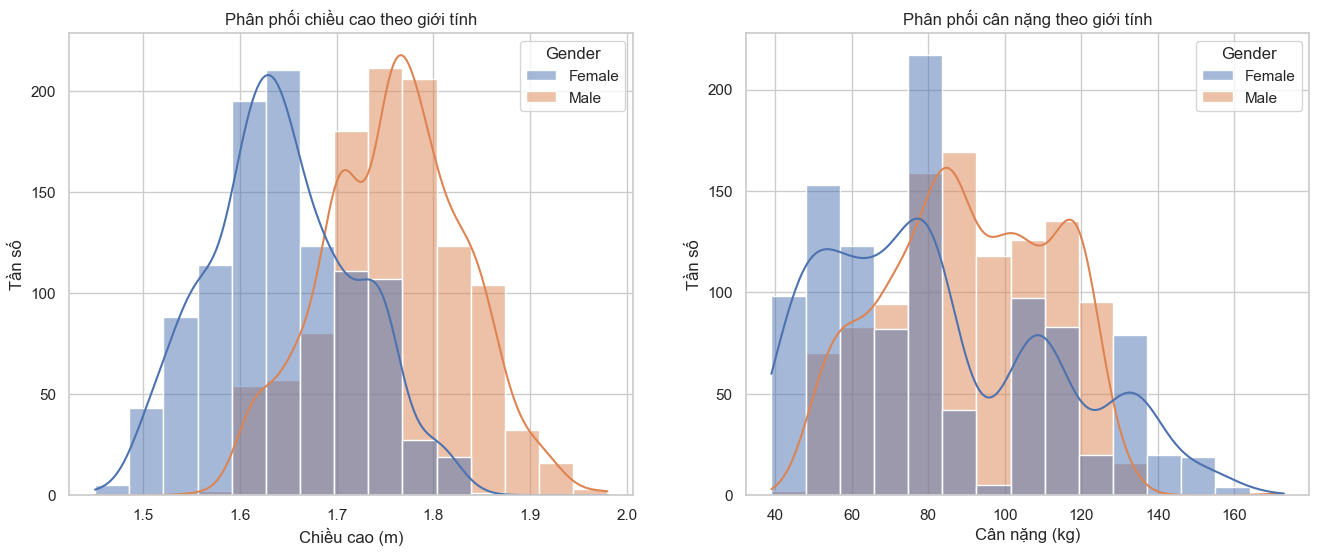

In [126]:
# 1. Biểu đồ phân phối chiều cao theo giới tính
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=data, x='Height', hue='Gender', kde=True, bins=15, ax=axes[0])
axes[0].set_title('Phân phối chiều cao theo giới tính')
axes[0].set_xlabel('Chiều cao (m)')
axes[0].set_ylabel('Tần số')

# 2. Biểu đồ phân phối cân nặng theo giới tính
sns.histplot(data=data, x='Weight', hue='Gender', kde=True, bins=15, ax=axes[1])
axes[1].set_title('Phân phối cân nặng theo giới tính')
axes[1].set_xlabel('Cân nặng (kg)')
axes[1].set_ylabel('Tần số')

# plt.tight_layout()
plt.show()


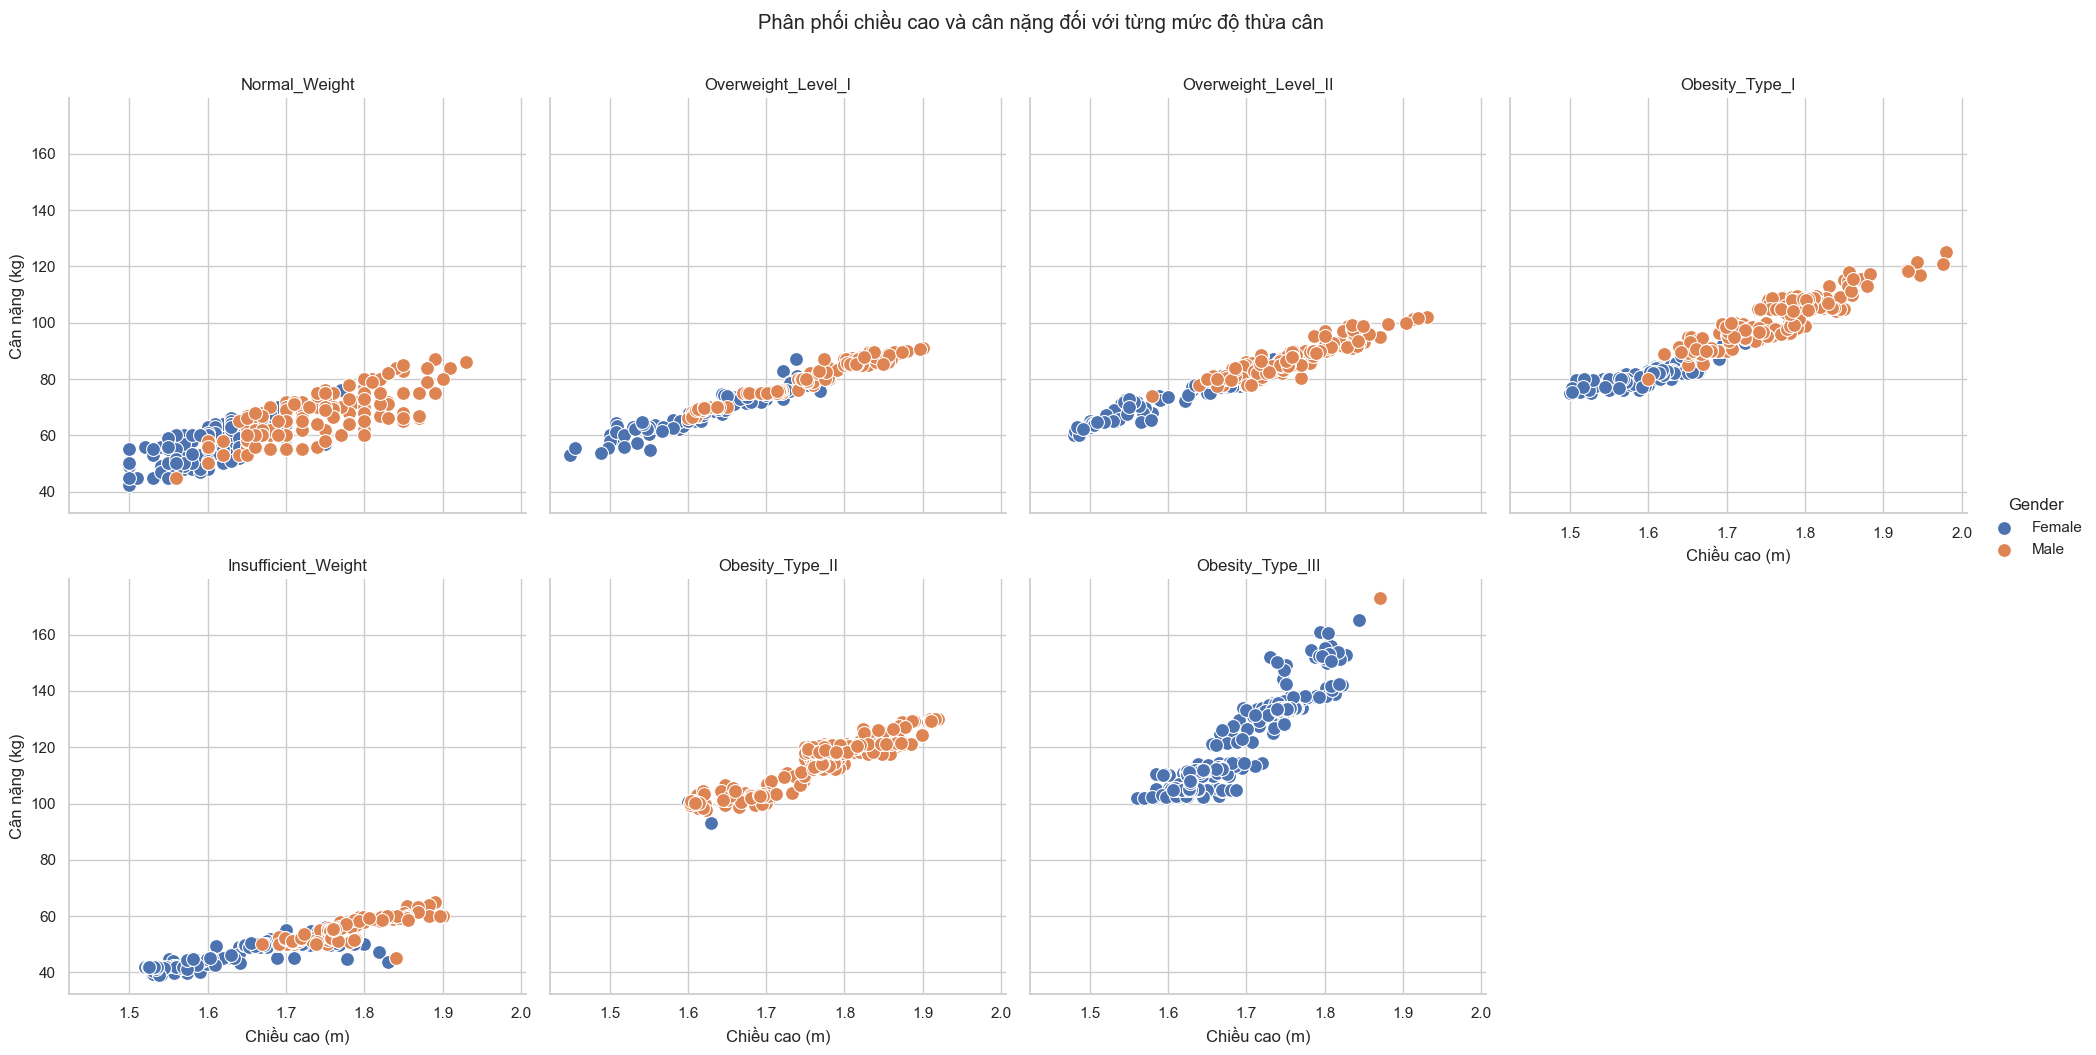

In [127]:
# Tạo grid các biểu đồ scatter với mỗi mức độ thừa cân
g = sns.FacetGrid(data, col="NObeyesdad", hue="Gender", palette="deep", height=5, aspect=1, col_wrap=4)
g.map_dataframe(sns.scatterplot, x="Height", y="Weight", s=100)
g.add_legend()

# Set tiêu đề và nhãn trục
g.set_axis_labels("Chiều cao (m)", "Cân nặng (kg)")
g.set_titles("{col_name}")
plt.suptitle('Phân phối chiều cao và cân nặng đối với từng mức độ thừa cân', y=1.05)
plt.show()


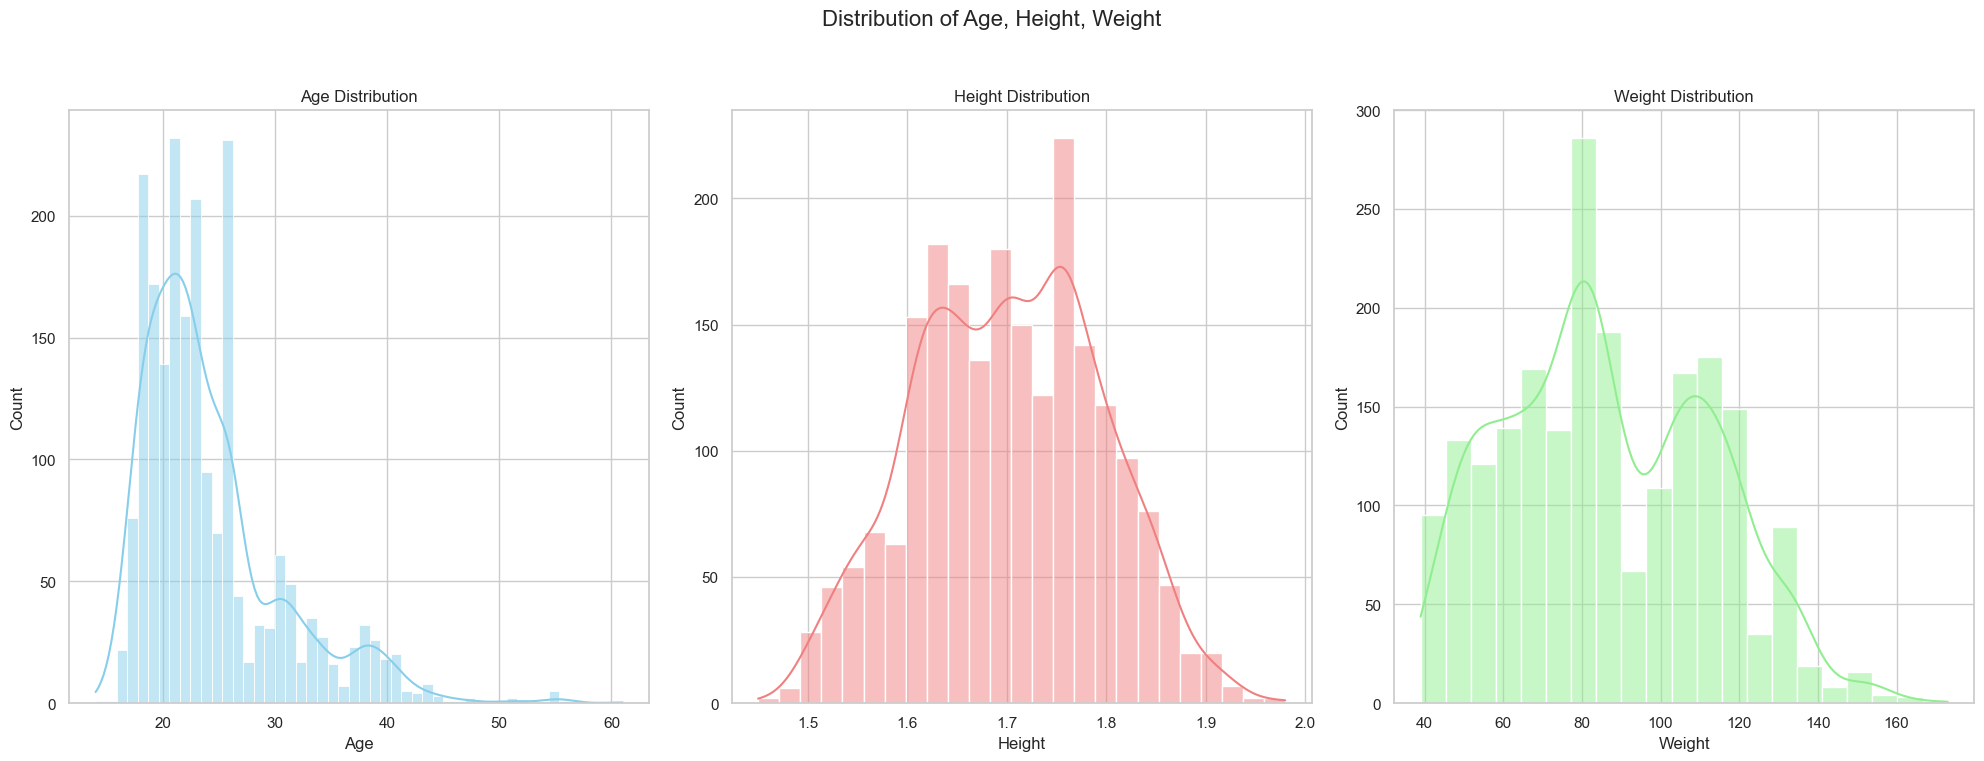

In [128]:
# Set up the figure for multiple plots in a single row
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Distribution of Age, Height, Weight', fontsize=16)

# Age distribution
sns.histplot(data['Age'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution')

# Height distribution
sns.histplot(data['Height'], kde=True, color='lightcoral', ax=axes[1])
axes[1].set_title('Height Distribution')

# Weight distribution
sns.histplot(data['Weight'], kde=True, color='lightgreen', ax=axes[2])
axes[2].set_title('Weight Distribution')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Tiền xử lí dữ liệu

### Xử lí các dòng trống, null và bị trùng lặp

- Do dữ liệu **không có** các dòng trống hoặc null 

- Chỉ cần xử lí các dòng bị trùng lặp

In [129]:
# Dữ liệu trước khi xử lí
print('Số dòng bị trùng: ', data.duplicated().sum())
data[data.duplicated()].head()

Số dòng bị trùng:  24


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I


In [130]:
# Xóa dữ liệu trùng
data = data.drop_duplicates()

In [131]:
# Dữ liệu sau khi xử lí
print('Số dòng bị trùng: ', data.duplicated().sum())

Số dòng bị trùng:  0


### Mã hóa các cột kiểu phân loại (categorical)

In [132]:
le = LabelEncoder()

categorical_cols = [
    'Gender',
    'family_history_with_overweight',
    'FAVC',
    'CAEC',
    'SMOKE',
    'SCC',
    'CALC',
    'MTRANS',
    'NObeyesdad'
]

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

C:\Users\TriLuu\AppData\Local\Temp\ipykernel_19240\3542278989.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])


### Chuẩn hóa các cột dữ liệu số

In [133]:
scaler = StandardScaler()
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
data.loc[:, numeric_features] = scaler.fit_transform(data[numeric_features])

In [134]:
# Dữ liệu sau khi xử lí
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.526613,-0.887408,-0.872985,1,0,-0.788364,0.390906,2,0,-0.007810,0,-1.186977,0.554211,3,3,1
1,0,-0.526613,-1.960788,-1.178508,1,0,1.082164,0.390906,2,1,1.636552,1,2.328908,-1.090505,2,3,1
2,1,-0.212507,1.044677,-0.376509,1,0,-0.788364,0.390906,2,0,-0.007810,0,1.156947,0.554211,1,3,1
3,1,0.415705,1.044677,0.005395,0,0,1.082164,0.390906,2,0,-0.007810,0,1.156947,-1.090505,1,4,5
4,1,-0.369560,0.830001,0.112328,0,0,-0.788364,-2.225418,2,0,-0.007810,0,-1.186977,-1.090505,2,3,6


## Xây dựng các mô hình phân loại và hồi quy

### Phân chia tập train - test

In [135]:
# Loại bỏ cột mục tiêu cho tập train X
X = data.drop(columns=['NObeyesdad', 'Weight'])

# Cột mục tiêu cho phân loại
y_classification = data['NObeyesdad']

# Cột mục tiêu cho hồi quy
y_regression = data['Weight']

# Chia dữ liệu thành tập train và tập test cho phân loại
(
    X_train_classification,
    X_test_classification,
    y_train_classification,
    y_test_classification,
) = train_test_split(X, y_classification, test_size=0.2, random_state=1)

# Chia dữ liệu thành tập train và tập test cho hồi quy
(
    X_train_regression,
    X_test_regression,
    y_train_regression,
    y_test_regression,
) = train_test_split(X, y_regression, test_size=0.2, random_state=42)


#### Kiểm tra độ cân bằng của dự liệu

In [136]:
y_train_classification.value_counts(normalize=True)

NObeyesdad
2    0.170162
4    0.155782
6    0.142001
3    0.136010
5    0.134811
1    0.133014
0    0.128220
Name: proportion, dtype: float64

In [137]:
y_train_regression.value_counts(normalize=True)

Weight
-0.261938    0.027561
-0.452890    0.018574
-1.025746    0.016777
-1.407651    0.014979
-0.643842    0.013182
               ...   
 0.210415    0.000599
-1.813557    0.000599
 1.292525    0.000599
-1.037868    0.000599
 0.418972    0.000599
Name: proportion, Length: 1242, dtype: float64

#### Tập train - test sau khi phân chia

In [138]:
X_train_classification.head()

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
169,0,3.242660,-0.780070,1,1,-0.788364,0.390906,1,0,-1.652172,0,-1.186977,-1.090505,3,0
1630,1,0.950189,-0.067721,1,1,0.692458,-0.744199,2,0,-1.233535,0,-0.421995,0.621172,3,3
1141,0,-0.215498,-0.026385,1,1,-0.788364,0.149230,2,0,-0.629027,0,-0.643314,1.315162,3,3
662,0,-0.596864,-1.924014,0,1,1.082164,-2.225418,1,0,-1.347863,0,-1.186977,-0.964431,2,3
1830,0,0.186544,-0.364575,1,1,1.082164,0.390906,2,0,-0.974614,0,-1.018267,0.148093,2,3


In [139]:
y_train_classification.head()

169     6
1630    3
1141    6
662     0
1830    4
Name: NObeyesdad, dtype: int32

In [140]:
y_train_classification = le.fit_transform(y_train_classification)

In [141]:
X_train_regression.head()

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
44,1,-0.526613,1.152015,0,0,-2.658892,0.390906,3,0,-0.007810,0,1.156947,-1.090505,3,3
691,1,-0.997772,0.902540,0,1,0.924067,0.390906,2,0,-0.373703,0,0.075776,0.554211,2,3
667,1,-0.307288,1.786361,1,1,1.082164,0.735216,2,0,0.375777,0,0.638631,-1.089921,2,0
170,1,-0.369560,0.185973,0,1,-0.788364,-2.225418,2,0,-0.007810,0,1.156947,0.554211,2,3
310,1,-1.154825,0.937339,1,1,-0.788364,1.699068,1,0,-0.007810,0,1.156947,0.554211,3,3


In [142]:
y_train_regression.head()

44    -0.261938
691   -1.349431
667   -0.971854
170   -0.185557
310   -1.140318
Name: Weight, dtype: float64

### Classification

#### Huấn luyện mô hình

In [143]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
}

classification_reports_classifier = {}
class_results_classifier = {}
confusion_matrixs_classifier = {}
mean_squared_errors_classifier = {}

for name, model in classifiers.items():
    model.fit(X_train_classification, y_train_classification)
    predictions = model.predict(X_test_classification)
    accuracy = accuracy_score(y_test_classification, predictions)
    class_results_classifier[name] = accuracy
    print(f"{name} Classification Accuracy: {accuracy:.2f}")
    classification_reports_classifier[name] = classification_report(y_test_classification, predictions)
    confusion_matrixs_classifier[name] = confusion_matrix(y_test_classification, predictions)
    mean_squared_errors_classifier[name] = mean_squared_error(y_test_classification, predictions)




Logistic Regression Classification Accuracy: 0.60
Random Forest Classification Accuracy: 0.89
SVM Classification Accuracy: 0.63


#### Đánh giá mô hình 

##### Classification report

In [144]:
print('Classification report cho Logistic Regression')
print(classification_reports_classifier['Logistic Regression'])

Classification report cho Logistic Regression
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        53
           1       0.48      0.25      0.33        60
           2       0.51      0.67      0.58        67
           3       0.55      0.87      0.67        70
           4       0.90      0.98      0.94        64
           5       0.63      0.47      0.54        51
           6       0.48      0.19      0.27        53

    accuracy                           0.60       418
   macro avg       0.59      0.58      0.56       418
weighted avg       0.59      0.60      0.57       418



In [145]:
print('Classification report cho Random Forest')
print(classification_reports_classifier['Random Forest'])

Classification report cho Random Forest
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        53
           1       0.76      0.78      0.77        60
           2       0.93      0.94      0.93        67
           3       0.93      0.96      0.94        70
           4       1.00      0.98      0.99        64
           5       0.89      0.82      0.86        51
           6       0.83      0.83      0.83        53

    accuracy                           0.89       418
   macro avg       0.89      0.89      0.89       418
weighted avg       0.90      0.89      0.89       418



In [146]:
print('Classification report cho SVM')
print(classification_reports_classifier['SVM'])

Classification report cho SVM
              precision    recall  f1-score   support

           0       0.56      0.72      0.63        53
           1       0.53      0.28      0.37        60
           2       0.52      0.69      0.59        67
           3       0.66      0.93      0.77        70
           4       0.94      0.98      0.96        64
           5       0.59      0.47      0.52        51
           6       0.50      0.23      0.31        53

    accuracy                           0.63       418
   macro avg       0.61      0.61      0.59       418
weighted avg       0.62      0.63      0.61       418



##### Mean sqaured error

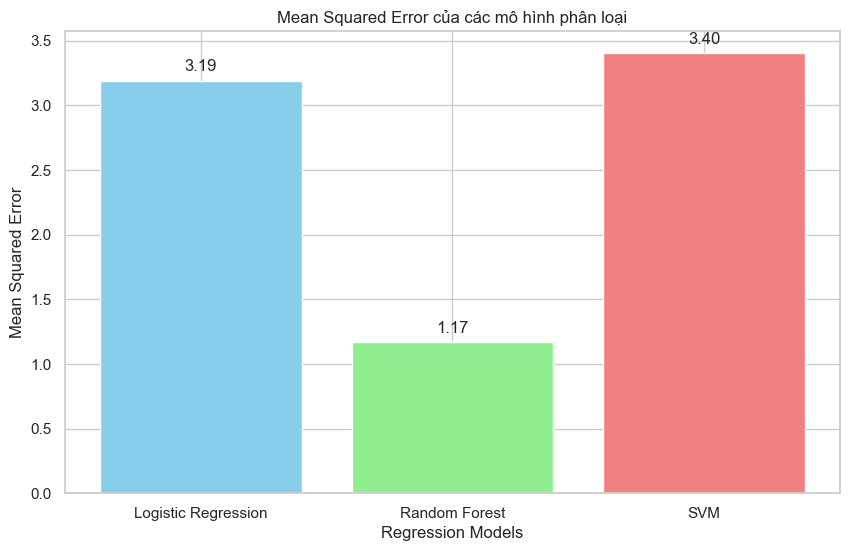

In [147]:
# Plotting the mean squared error for regression models
plt.figure(figsize=(10, 6))
plt.bar(mean_squared_errors_classifier.keys(), mean_squared_errors_classifier.values(), color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error của các mô hình phân loại')

for i, (model, mse) in enumerate(mean_squared_errors_classifier.items()):
    plt.annotate(f'{mse:.2f}', (i, mse + 0.05), ha='center', va='bottom')
    
plt.show()

##### Confusion matrix

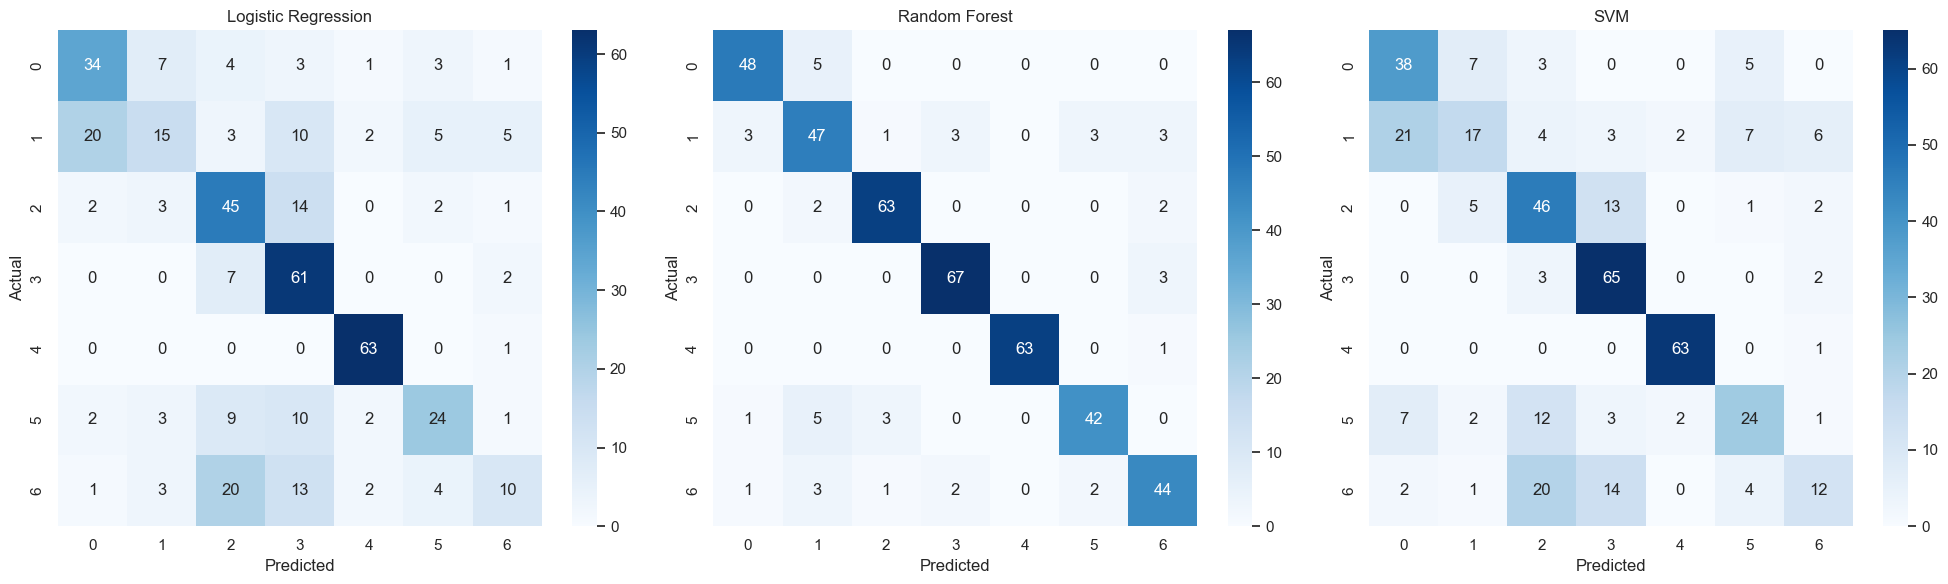

In [148]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Logistic Regression Confusion Matrix
sns.heatmap(confusion_matrixs_classifier['Logistic Regression'], annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest Confusion Matrix
sns.heatmap(confusion_matrixs_classifier['Random Forest'], annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# SVM Confusion Matrix
sns.heatmap(confusion_matrixs_classifier['SVM'], annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('SVM')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### Regression

#### Huấn luyện mô hình

Linear Regression model score: 0.5577568145389484
Linear Regression Regression Mean Squared Error: 0.45


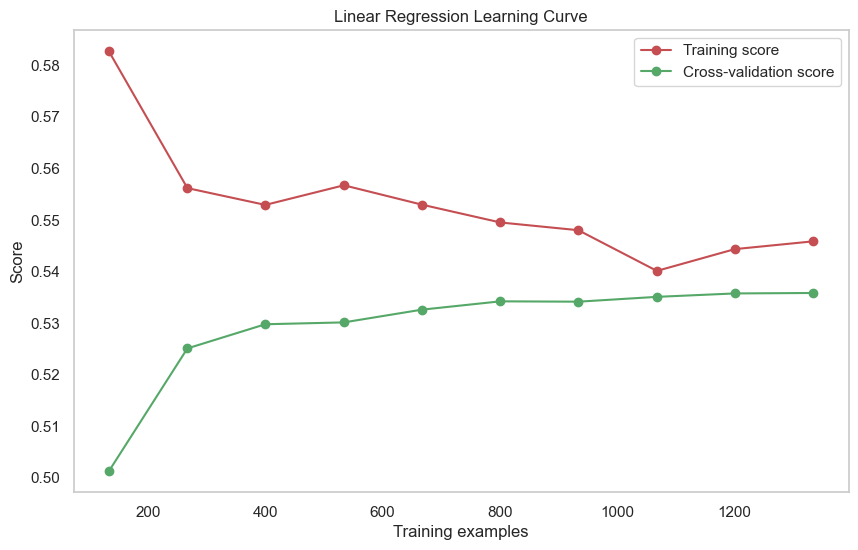

Random Forest model score: 0.8833892572362612
Random Forest Regression Mean Squared Error: 0.12


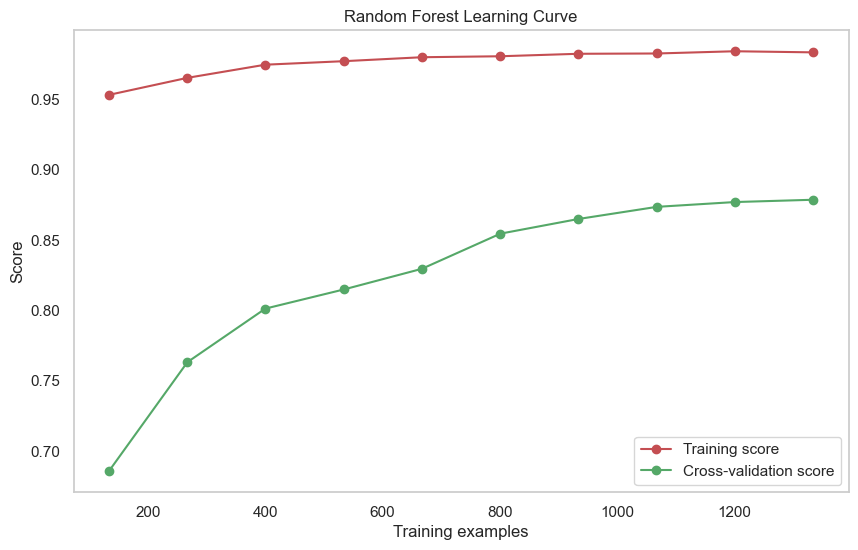

SVR model score: 0.5462789593331663
SVR Regression Mean Squared Error: 0.47


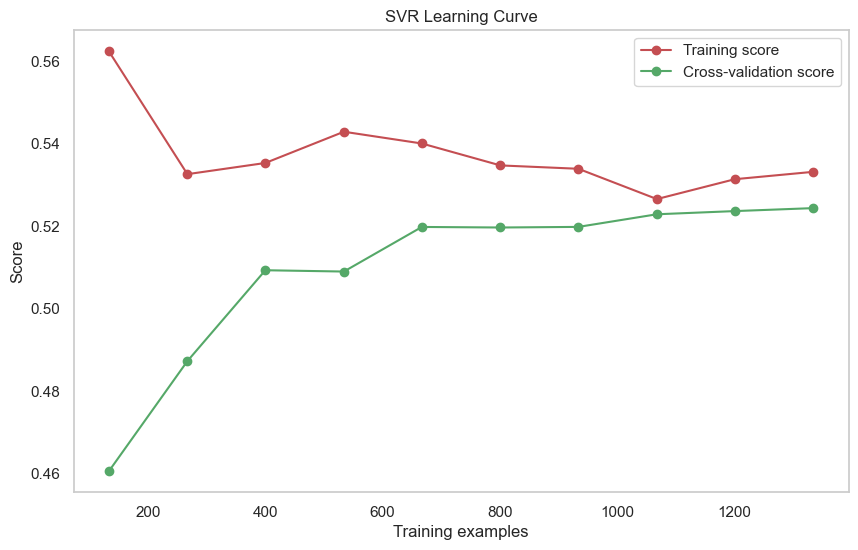

In [149]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Define regressors
regressors = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='linear', C=1.0, epsilon=0.2),
}

reg_results = {}
mean_squared_errors_regressors = {}

# Function to plot learning curves
def plot_learning_curve(model, X, y, title, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    # Calculate learning curve data
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    # Plot training and validation scores
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Training models and plotting learning curves
for name, model in regressors.items():
    # Train the model and calculate metrics
    model.fit(X_train_regression, y_train_regression)
    print(f"{name} model score:", model.score(X_test_regression, y_test_regression))
    
    predictions = model.predict(X_test_regression)
    mse = mean_squared_error(y_test_regression, predictions)
    reg_results[name] = mse
    print(f"{name} Regression Mean Squared Error: {mse:.2f}")
    mean_squared_errors_regressors[name] = mse

    # Plot learning curve for each model
    plot_learning_curve(model, X_train_regression, y_train_regression, f"{name} Learning Curve")


#### Đánh giá mô hình

##### Classification report

In [150]:
print('Classification report cho Linear Regression')
# print(classification_reports_regressors['Linear Regression'])

Classification report cho Linear Regression


##### Mean squared error

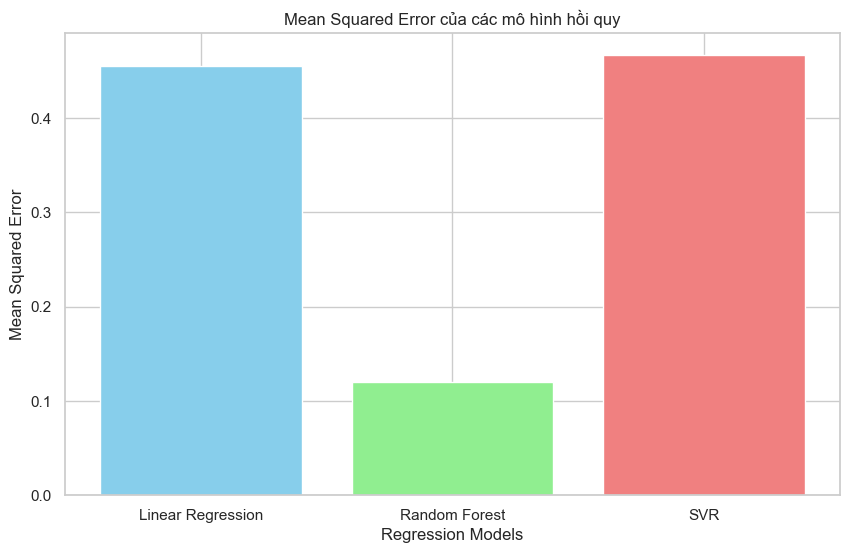

In [151]:
# Plotting the mean squared error for regression models
plt.figure(figsize=(10, 6))
plt.bar(mean_squared_errors_regressors.keys(), mean_squared_errors_regressors.values(), color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error của các mô hình hồi quy')
    
plt.show()

##### Confusion matrix

#### Learning curve